## Importing Libraries and Overview

This section imports essential Python libraries for data retrieval, processing, and visualization:

- `requests`: For HTTP requests to the API.
- `pandas`: For data manipulation.
- `plotly.express`, `plotly.graph_objects`, `plotly.io`: For interactive plotting.
- `IPython.display`: For rendering images in the notebook.

### Process Overview
The notebook fetches financial data from a custom FastAPI endpoint, including tabular data and a profit margin image, which is displayed as the initial visualization before further analysis.

In [1]:
import requests
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image, display

## Fetching Data and Image from API

This section sends a request to the custom FastAPI endpoint (`http://127.0.0.1:8000/analysis/{ticker}`) to retrieve financial data and a profit margin image for the ticker "AMZN":

- The API returns tabular data (converted to a DataFrame) and an image URI.
- The image, generated by the API, is fetched and displayed directly using `IPython.display`.
- Error handling ensures feedback if the API call fails.


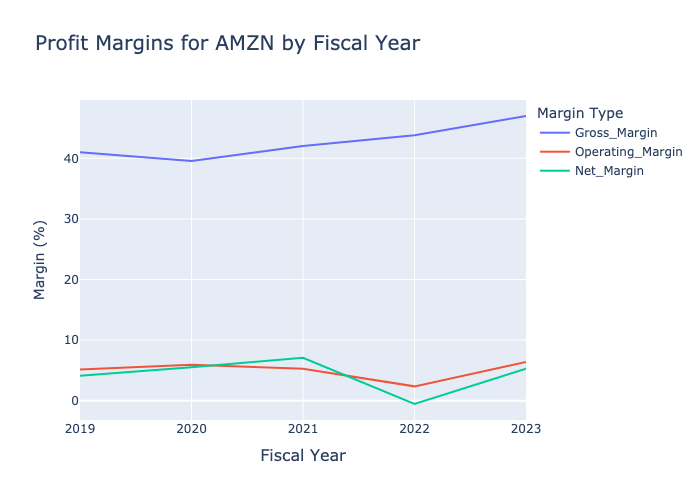

In [2]:
pio.renderers.default = 'png'

ticker = "AMZN"
variant = "annual"
res = requests.get(f"http://127.0.0.1:8000/analysis/{ticker}")

# Only if the API call was successful and returned data
if res.status_code == 200 and 'data' in res.json():
    data = res.json()['data']
    df = pd.DataFrame(data)
    image_data_uri = res.json()['image']
    display(Image(url=image_data_uri))
else:
    print(f"❌ API call failed with status {res.status_code}: {res.text}")

## P/E Ratio Bar Chart

Creates a bar chart to visualize the Price-to-Earnings (P/E) ratio over fiscal years for "AMZN":

- Uses `plotly.express` for an interactive plot.
- X-axis: `Fiscal Year`.
- Y-axis: `PE Ratio`.

Note: The example below uses "AMZN" (Amazon) as the ticker symbol, but the code is designed to work with any stock ticker provided.





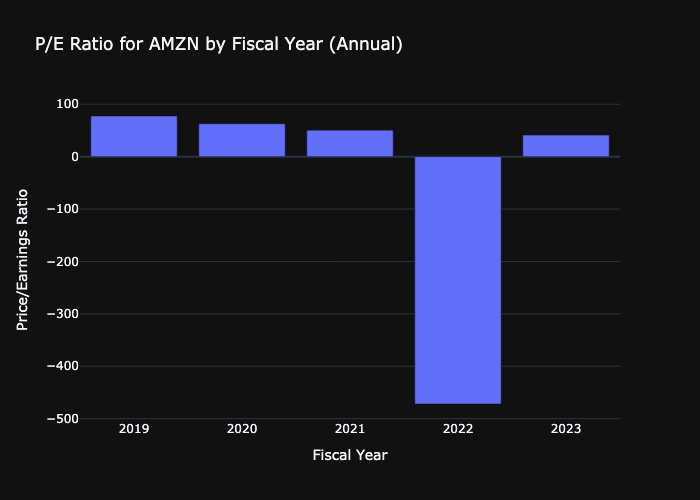

In [3]:
fig_pe = px.bar(
    df,
    x='Fiscal Year',
    y='PE Ratio',
    title=f"P/E Ratio for {ticker} by Fiscal Year ({variant.capitalize()})",
    labels={'PE Ratio': 'Price/Earnings Ratio'}
)
fig_pe.show()

## Profit Margins Line Chart

Visualizes Gross, Operating, and Net profit margins over fiscal years:

- Uses `plotly.express` to plot multiple lines.
- X-axis: `Fiscal Year`.
- Y-axis: `Gross_Margin`, `Operating_Margin`, `Net_Margin`.

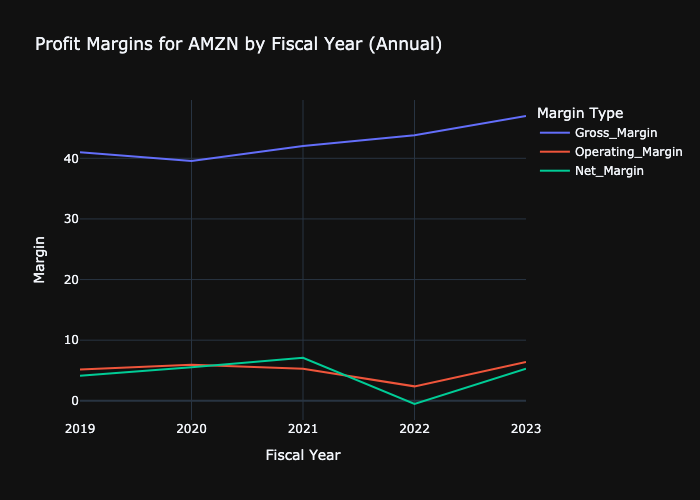

In [4]:
fig_margins = px.line(
    df,
    x='Fiscal Year',
    y=['Gross_Margin', 'Operating_Margin', 'Net_Margin'],
    title=f"Profit Margins for {ticker} by Fiscal Year ({variant.capitalize()})",
    labels={'value': 'Margin', 'variable': 'Margin Type'}
)
fig_margins.show()

## Dual-Axis Chart: Share Price and P/E Ratio

Combines average share price and P/E ratio in a dual-axis line chart:

- Uses `plotly.graph_objects` for custom layout.
- Left Y-axis: `Average_Share_Price`.
- Right Y-axis: `PE Ratio`.
- X-axis: `Fiscal Year`.

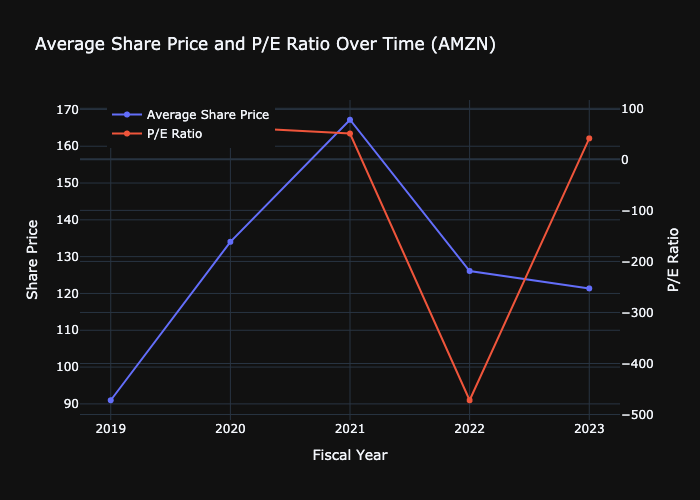

In [5]:
df['Publish Date'] = pd.to_datetime(df['Publish Date'])
df_prices_filtered = df[['Fiscal Year', 'Average_Share_Price', 'PE Ratio', 'Publish Date']].dropna()
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_prices_filtered['Fiscal Year'],
    y=df_prices_filtered['Average_Share_Price'],
    mode='lines+markers',
    name='Average Share Price',
    yaxis='y1'
))
fig.add_trace(go.Scatter(
    x=df_prices_filtered['Fiscal Year'],
    y=df_prices_filtered['PE Ratio'],
    mode='lines+markers',
    name='P/E Ratio',
    yaxis='y2'
))
fig.update_layout(
    title=f'Average Share Price and P/E Ratio Over Time ({ticker})',
    xaxis_title='Fiscal Year',
    yaxis=dict(title='Share Price', side='left'),
    yaxis2=dict(title='P/E Ratio', overlaying='y', side='right'),
    legend=dict(x=0.05, y=1)
)

fig.show()

## Volatility Line Chart

Plots the annualized stock volatility over fiscal years for a given stock ticker.

- Uses `plotly.express` with markers for a clear visual trend.
- X-axis: `Fiscal Year`.
- Y-axis: `Volatility (%)`.

**What is Volatility?**

Volatility represents the degree of variation in a stock’s price over time. It is a measure of how much the stock price fluctuates, often expressed on an annualized basis as a percentage.

- **High volatility** indicates larger swings in price, suggesting higher risk but also potential for greater returns.
- **Low volatility** implies more stable prices, generally considered less risky.

This chart helps visualize how the stock’s risk profile changes across different fiscal years.


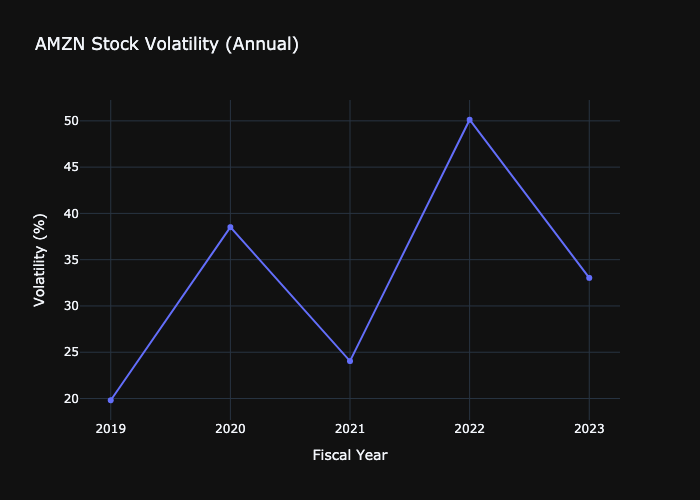

In [6]:
fig = px.line(
    df,
    x="Fiscal Year",
    y="Volatility (%)",
    title=f"{ticker} Stock Volatility ({variant.capitalize()})",
    labels={"Volatility (%)": "Volatility (%)", "Fiscal Year": "Fiscal Year"},
    markers=True
)
fig.show()

## CAGR Line Chart

Displays the Compound Annual Growth Rate (CAGR) over fiscal years for a given stock ticker.

- Uses `plotly.express` with enhanced markers for clarity.
- X-axis: `Fiscal Year`.
- Y-axis: `CAGR (%)`.

**What is CAGR?**

CAGR measures the average annual growth rate of an investment over a period, assuming profits are reinvested. It gives a smoothed rate that helps compare performance across time.


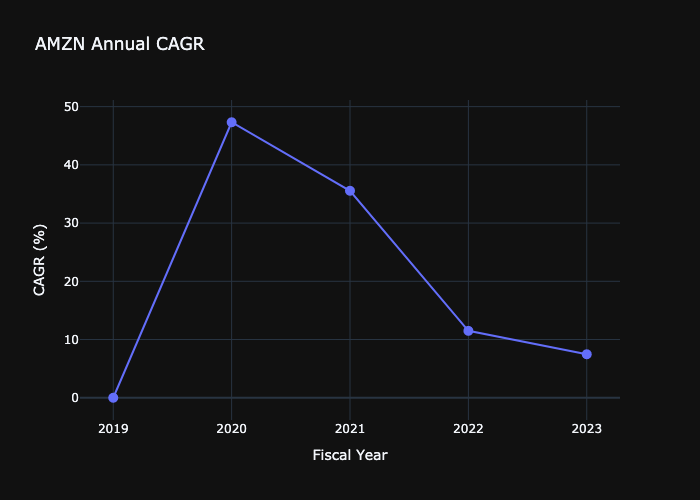

In [7]:
fig_cagr = px.line(
    df,
    x="Fiscal Year",
    y="CAGR (%)",
    title=f"{ticker} Annual CAGR",
    labels={"CAGR (%)": "CAGR (%)", "Fiscal Year": "Fiscal Year"},
    markers=True,
    line_shape='linear'
)
fig_cagr.update_traces(marker=dict(size=10))
fig_cagr.show()

## Analysis of Results for Amazon (AMZN)

### Key Insights (2019-2023)
- **P/E Ratio:** Stable at 50-75 (2019-2021).
- Dropped to -300 in 2022 (negative earnings).
- Recovered to ~50 in 2023, showing caution.
- **CAGR:** Peaked at 45-50% in 2020 (Coronavirus).
- Fell to 5-10% by 2023, more sustainable growth.
- **Profit Margins:** Gross rose from 38% to 42%.
- Operating margin fell to 1% in 2022, up to 3% in 2023.
- Net margin dropped to 0.5% in 2022, 2% in 2023.
- **Share Price:** Grew from 100 to 165 (2019-2021).
- Fell to 120 by 2023, reflecting market correction.
- **Volatility:** High at 40% (2020), 45% (2022).
- Lower at 25% (2021), 35% (2023), still risky.

### Implications
- **Growth:** Strong 2020 slowed due to competition.
- **Profitability:** 2022 cost pressures hurt margins.
- 2023 shows recovery but margins remain low.
- **Risk:** High volatility signals market sensitivity.
- **Investor Trust:** Cautious after 2022 P/E drop.
- **Strategy:** Focus on cost control, diversification.